# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration

In [2]:
df = pd.read_csv("data/crop_production.csv")
df = df[:10000]
df.head

<bound method NDFrame.head of                        State_Name District_Name  Crop_Year       Season  \
0     Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1     Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2     Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3     Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4     Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                           ...           ...        ...          ...   
9995            Arunachal Pradesh     CHANGLANG       2002  Rabi          
9996            Arunachal Pradesh     CHANGLANG       2002  Whole Year    
9997            Arunachal Pradesh     CHANGLANG       2002  Whole Year    
9998            Arunachal Pradesh     CHANGLANG       2002  Whole Year    
9999            Arunachal Pradesh     CHANGLANG       2002  Whole Year    

                     Crop    Area  Production  
0                Arec

# Data Processing

In [3]:
df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       69
dtype: int64

In [4]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(9931, 7)
(69, 6)


In [5]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
9995,Arunachal Pradesh,CHANGLANG,2002,Rabi,Wheat,200.0,320.0
9996,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry chillies,320.0,480.0
9997,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry ginger,450.0,2475.0
9998,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Oilseeds total,3500.0,2887.0


In [6]:
test

,State_Name,District_Name,Crop_Year,Season,Crop,Area
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00
...,...,...,...,...,...,...
9275,Andhra Pradesh,WEST GODAVARI,1998,Kharif,Moong(Green Gram),100.00
9452,Andhra Pradesh,WEST GODAVARI,2003,Rabi,other oilseeds,4367.00
9586,Andhra Pradesh,WEST GODAVARI,2007,Rabi,Sesamum,1000.00
9628,Andhra Pradesh,WEST GODAVARI,2009,Kharif,Soyabean,5.00


In [7]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 3
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh']
column name : District_Name
No. of column : 18
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG']
column name : Crop_Year
No. of column : 18
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014]
column name : Season
No. of column : 4
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ']
column name : Crop
No. of column : 71
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Rag

In [8]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.108457e-05
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,5.542283e-09
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1.779073e-06
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.552604e-06
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,9.144768e-07


# Visualization

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

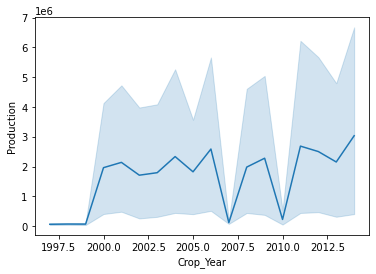

In [10]:
sns.lineplot(data["Crop_Year"],data["Production"])

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh')])

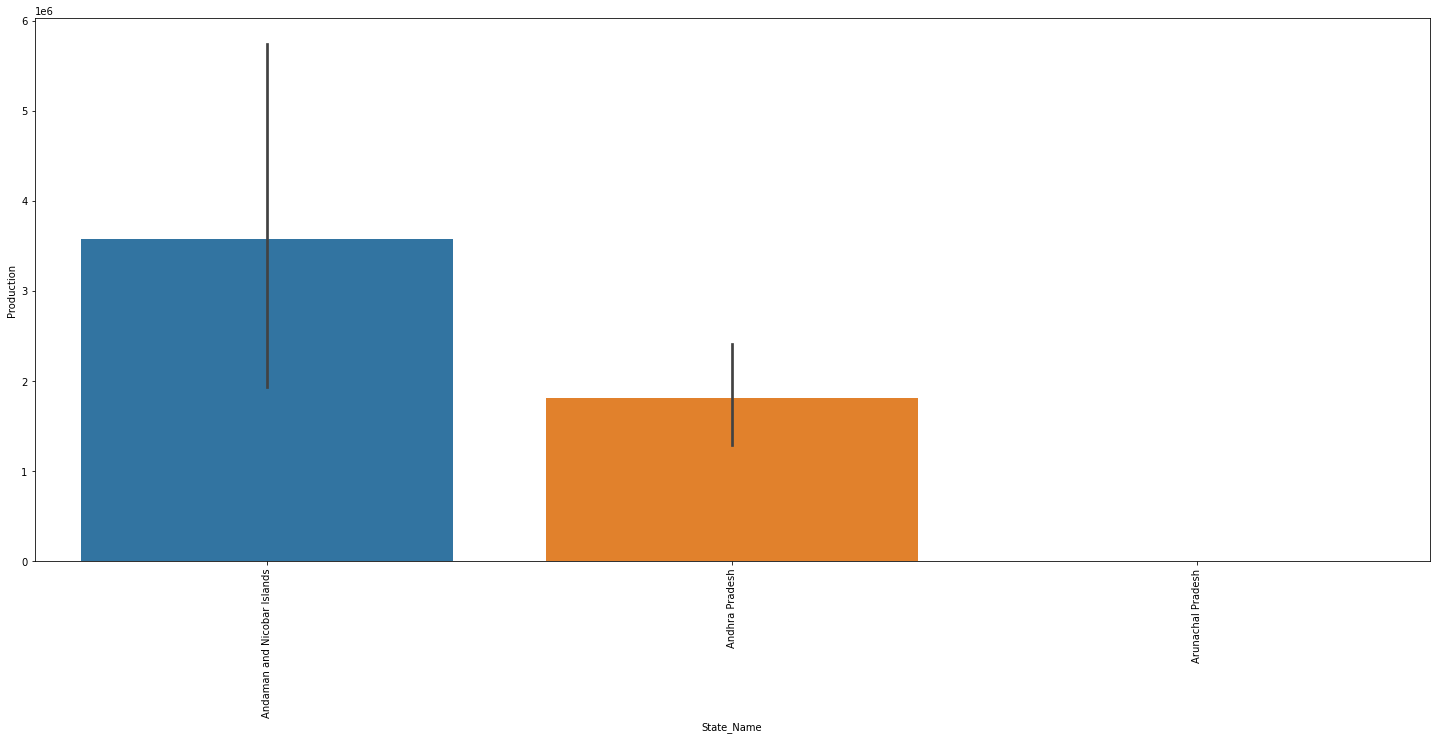

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

In [ ]:
sns.jointplot(data["Area"],data["Production"],kind='reg')

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
sns.barplot(data["Season"],data["Production"])

In [ ]:
sns.jointplot(data["Area"],data["Production"],kind='reg')
sns.barplot(data["Season"],data["Production"])
data.groupby("Season",axis=0).agg({"Production":np.sum})
data["Crop"].value_counts()[:5]
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]
sns.barplot("Season","Production",data=rice_df)
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

sns.jointplot("Area","Production",data=rice_df,kind="reg")


coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

sns.barplot("Season","Production",data=coc_df)

plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()


top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()



sns.jointplot("Area","Production",data=coc_df,kind="reg")


sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]


sns.barplot("Season","Production",data=sug_df)


plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

plt.figure(figsize=(18,8))
sns.barplot("District_Name","Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)

plt.show()

sns.jointplot("Area","Production",data=sug_df,kind="reg")

# Data Cleaning

In [10]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.108457e-05
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,5.542283e-09
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1.779073e-06
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.552604e-06
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,9.144768e-07
...,...,...,...,...,...,...,...,...
9995,Arunachal Pradesh,CHANGLANG,2002,Rabi,Wheat,200.0,320.0,1.773531e-06
9996,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry chillies,320.0,480.0,2.660296e-06
9997,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Dry ginger,450.0,2475.0,1.371715e-05
9998,Arunachal Pradesh,CHANGLANG,2002,Whole Year,Oilseeds total,3500.0,2887.0,1.600057e-05


In [11]:
df1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [12]:
df1

,State_Name,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0,1.108457e-05
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0,5.542283e-09
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0,1.779073e-06
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0,3.552604e-06
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0,9.144768e-07
...,...,...,...,...,...,...
9995,Arunachal Pradesh,Rabi,Wheat,200.0,320.0,1.773531e-06
9996,Arunachal Pradesh,Whole Year,Dry chillies,320.0,480.0,2.660296e-06
9997,Arunachal Pradesh,Whole Year,Dry ginger,450.0,2475.0,1.371715e-05
9998,Arunachal Pradesh,Whole Year,Oilseeds total,3500.0,2887.0,1.600057e-05


In [13]:
data_dum = pd.get_dummies(df1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,Season_Autumn,Season_Kharif,Season_Rabi,Season_Whole Year,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.108457e-05,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,5.542283e-09,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1.779073e-06,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,3.552604e-06,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,9.144768e-07,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 0 to 9999
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area                                    9931 non-null   float64
 1   Production                              9931 non-null   float64
 2   percent_of_production                   9931 non-null   float64
 3   State_Name_Andaman and Nicobar Islands  9931 non-null   uint8  
 4   State_Name_Andhra Pradesh               9931 non-null   uint8  
 5   State_Name_Arunachal Pradesh            9931 non-null   uint8  
 6   Season_Autumn                           9931 non-null   uint8  
 7   Season_Kharif                           9931 non-null   uint8  
 8   Season_Rabi                             9931 non-null   uint8  
 9   Season_Whole Year                       9931 non-null   uint8  
 10  Crop_Arecanut                           9931 non-null   uint

# Feature Selection and Data Splitting

In [16]:
x = np.array(data_dum.drop("Production",axis=1))
y = np.array(data_dum[["Production"]])
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (6653, 80)
x_test : (3278, 80)
y_train : (6653, 1)
y_test : (3278, 1)


In [17]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# RNN

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math

2022-05-02 13:12:50.605358: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-05-02 13:12:50.605407: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
reg = Sequential()

reg.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

reg.compile(optimizer='adam', loss='mean_squared_error')

reg.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/5
104/104 [==============================] - 38s 361ms/step - loss: 1.0338
Epoch 2/5
104/104 [==============================] - 38s 368ms/step - loss: 1.0323
Epoch 3/5
104/104 [==============================] - 37s 360ms/step - loss: 1.0311
Epoch 4/5
104/104 [==============================] - 37s 359ms/step - loss: 1.0328
Epoch 5/5
104/104 [==============================] - 42s 402ms/step - loss: 1.0352


In [21]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
y_pred = reg.predict(x_test)
y_pred = std.inverse_transform(y_pred)
y_test = std.inverse_transform(y_test)

In [22]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

26487332.673383005


In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3458262.7698112894

In [23]:
from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

0.0017335687037245417

# Deep Q-NN

In [26]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (6653, 80)
x_test : (3278, 80)
y_train : (6653, 1)
y_test : (3278, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=80, activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=200,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training...


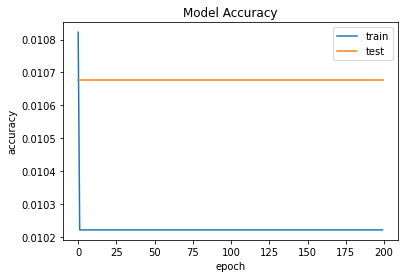

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

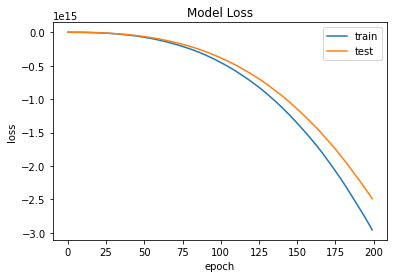

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [30]:
scores = model.evaluate(x_test, y_test, verbose=0)
rnn_acc = scores[1]*100
rnn_acc

1.0677242651581764

# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
from sklearn.metrics import r2_score
r_rf = r2_score(y_test,predictions)
print("R2score when we predict using Randomn forest is ",r_rf)

R2score when we predict using Randomn forest is  0.9983056855445793


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
preds = LR.predict(x_test)
preds

array([[  511.00001102],
       [ 5320.00000937],
       [  546.0000125 ],
       ...,
       [ 2596.00001076],
       [13006.00000965],
       [   41.0000124 ]])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r_lr = r2_score(y_test,preds)
print("R2score when we predict using Linear Regression is ",r_lr)

R2score when we predict using Linear Regression is  1.0


# KN Neighbors Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
preds = neigh.predict(x_test)
preds

array([[1117.5],
       [ 844.5],
       [ 110. ],
       ...,
       [2679.5],
       [7748.5],
       [  55. ]])

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r_knn = r2_score(y_test,preds)
print("R2score when we predict using KNeighbors is ",r_knn)

R2score when we predict using KNeighbors is  -0.0006150537107787457


# XGBoost Regressor

In [37]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
preds = xgb.predict(x_test)
preds

array([  545.64246,  4863.3755 ,   567.9626 , ...,  2204.6458 ,
       13168.61   ,   194.87865], dtype=float32)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r_xgb = r2_score(y_test,preds)
print("R2score when we predict using XGB is ",r_xgb)

R2score when we predict using XGB is  0.9978679611202548


# Accuracy Comparsion

In [39]:
score = [r_rf*100,r_lr*100,r_knn*100,r_xgb*100,rnn_acc,r]
#make variabel for save the result and to show it
classifier = ('Random Forest','Linear Regression','KNN','XGBoost','DQNN','RNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5]
[99.83056855445793, 100.0, -0.06150537107787457, 99.78679611202548, 1.0677242651581764, 0.0017335687037245417]


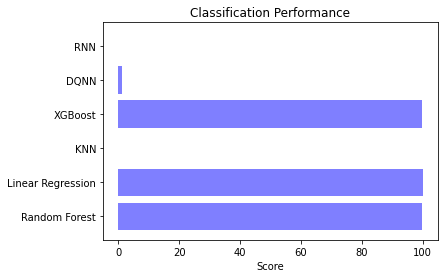

In [40]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Dumping

In [41]:
import pickle

# Saving model to disk
pickle.dump(RF, open('model/model.pkl','wb'))